<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/Punto_1_Parcial_2_S_y_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

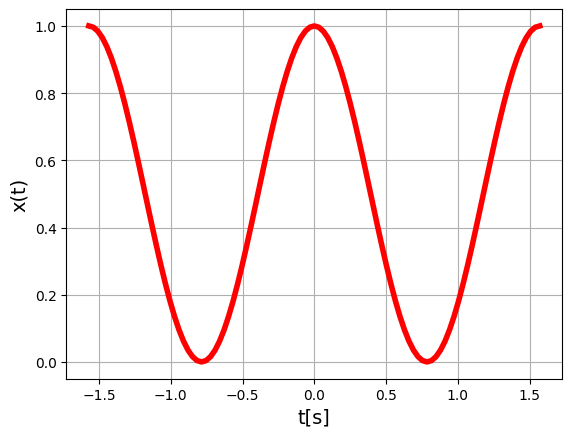

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#mostrar la señal
To = np.pi # periodo definido
Fo = 1/To
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-To/2,To/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
A=1 #Constante definida
x = (A*np.cos(2*np.pi*Fo*tv))**2

#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 50 #numero armonicos
wo = 2*np.pi/To # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = 0*nv
Cn[N] = (A**2)/2 #Nivel DC
Cn[N+2] = (A**2)/4
Cn[N-2] = (A**2)/4

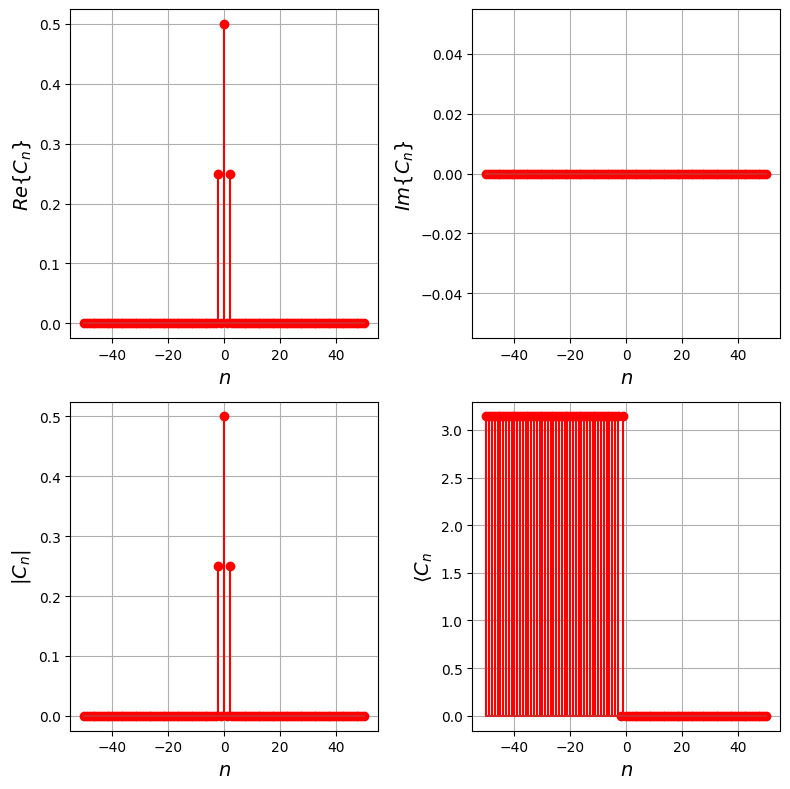

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<ipython-input-5-06927cfba69c>:4: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')


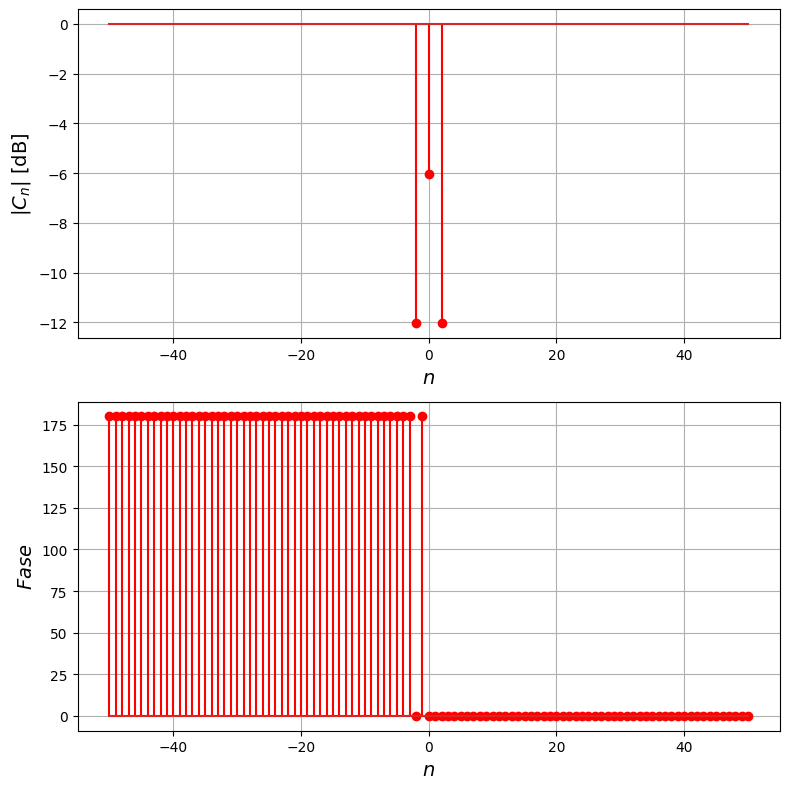

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.axis('tight')
plt.grid()


plt.subplot(2, 1, 2)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Fase$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.tight_layout()

In [ ]:
from ipywidgets import interact,IntSlider
Px = 0.375 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=5, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(0,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>